# Подготовка данных

In [127]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [128]:
# df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

In [129]:
len(df.columns)

283

In [130]:
df = df.dropna(subset=['sex'])
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [132]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

intervention_cols = ['single_vessel', 'trifurcation', 'bifurcation_location', 
                  'lesion_ivolves', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'cto_bifurc', 
                  'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

new_cols = ['adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan',
            'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation',
            'currently_on_dialysis', 'followup_1_year_do_not_complete_if_2nd_bifurcation_complete',
            'identifier', 'ishemia_test___1', 'ishemia_test___2', 'ishemia_test___3', 'ishemia_test___4',
            'kissing_post_2stent___1', 'kissing_post_2stent___2', 'left_main_stent_direction',
            'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia',
            'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2',
            'other_lesions_in_main_bran', 'other_lesions_in_side_brach',
            'patient_information_do_not_complete_if_2nd_bifurca_complete', 'pot_2', 'pot_balloon_diametr_2',
            'pot_balloon_length', 'pot_balloon_length_2', 'pressure2', 'reson_for_change_stopped___1',
            'reson_for_change_stopped___2', 'reson_for_change_stopped___3', 'restenosis_f5', 'sb_length_2',
            'sb_stenosis_f2', 'side_branch_calcification_2', 'side_branch_restenosis',
            'side_branch_restenosis_3', 'side_branch_restenosis_5', 'stent_pressure', 'stent_type_2___1',
            'stent_type_2___2', 'stent_type_2___3', 'stent_type_2___4', 'stent_type_2___5', 'stent_type_2___6',
            'stent_type_2___7', 'stent_type_2___8', 'stent_type_2___9', 'thrombolysis', 'uncross_strategy___1',
            'uncross_strategy___2', 'uncross_strategy___3', 'uncross_strategy___4', 'uncross_strategy___5',
            'uncross_strategy___6', 'uncross_strategy___7', 'uncross_strategy___8', 'uncross_strategy___9']

In [133]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [134]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [135]:
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
patient_present_cols = patient_info_cols + intervention_cols + operation_cols + new_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [137]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,clinical_presentation,time_from_mi_symptoms_onse,ccs_class,...,thrombolysis,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,5.0,4.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,NaN,1.0,...,NaN,0,0,0,0,0,0,0,0,0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,4.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,2.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,NaN,2.0,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,3.0,1.0,NaN,...,1.0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,3.0,1.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0


In [138]:
columns_to_preserve = ['valvular_disease', 'previous_stroke_tia', 'twostent_technique']

def remove_columns_with_nan_threshold(df, threshold=250):
    nan_counts = df.isnull().sum()
    
    columns_to_drop = [col for col in nan_counts[nan_counts > threshold].index 
                      if col not in columns_to_preserve]
    
    print(columns_to_drop)
    
    df_dropped = df.drop(columns=columns_to_drop)
    
    return df_dropped

In [139]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

['time_from_mi_symptoms_onse', 'ccs_class', 'insulin_diabetes', 'valvular_disease_was_previ', 'previously_treated_cerebro', 'previously_treated_periphe', 'lesion_ivolves', 'total_trobotic_occlusion', 'sb_length', 'timi_flow_main_branch', 'timi_flow_side_branch', 'stent_was_implated_from_lm', 'first_stent_impanted', 'provisional_2_stent_techni', 'dstent2', 'stent_length2', 'sb_stent_side_branch_diametr', 'proximal_optimization', 'pot', 'pot_balloon_diametr', 'several_kissing', 'adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan', 'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation', 'left_main_stent_direction', 'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia', 'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2', 'other_lesions_in_main_bran', 'other_lesions_in_side_brach', 'pot_2', 'pot_balloon_diametr_2', 'pot_balloon_length', 'pot_balloon_length_2', 'pressure2

In [140]:
# patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df = patient_present_df.drop(['date'], axis = 1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___9,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [142]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 
            'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
            'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 
            'stent_diameter', 'stent_length', 'stent_distal_vessel_size', 'sb_stent_sb_diametr',
            'ballooon_size_for_postdila', 
            'left_main_stent_direction',
            'mb_stenosis_f2',
            'myocardial_ischemia',
            'number_of_kissing_2',
            'pot_balloon_diametr_2',
            'pot_balloon_length',
            'pot_balloon_length_2',
            'pressure2',
            'sb_length_2',
            'sb_stenosis_f2',
            'stent_pressure']

categorical = ['sex', 'clinical_presentation', 'bifurcation_location', 'stent_number', 
              'stent_number_bif', 'stent_technique', 'stent_direction']

binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 
         'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1', 'if_yes_what_type___2',
         'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___6', 
         'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 
         'history_of_cancer', 'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation',
         'calcium', 'trombosis', 'restenosis_reocclusion', 'cto_bifurc', 
         'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm',
         'def', 'def_2', 'side_protection', 'main_predilatation', 'side_predilat',
         'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 
         'sb_dilatation', 'stent_postdilatation', 'kissing_post', 'modified_kis',
         'currently_on_dialysis',
         'ishemia_test___1',
         'ishemia_test___2',
         'ishemia_test___3',
         'kissing_post_2stent___1',
         'kissing_post_2stent___2',
         'reson_for_change_stopped___1',
         'reson_for_change_stopped___2',
         'reson_for_change_stopped___3',
         'stent_type_2___1',
         'stent_type_2___3',
         'stent_type_2___4',
         'stent_type_2___5',
         'stent_type_2___6',
         'stent_type_2___7',
         'stent_type_2___8',
         'uncross_strategy___1',
         'uncross_strategy___2',
         'uncross_strategy___3',
         'uncross_strategy___4',
         'uncross_strategy___8',
         'uncross_strategy___9']

In [144]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

158
2044


In [145]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [146]:
unique, counts = np.unique(combined_adverse_events, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1886, 1: 53, 2: 18, 3: 51, 4: 36}


In [147]:
id_col = patient_present_df['record_id']
patient_present_df = patient_present_df.drop(['record_id', 'identifier'], axis=1)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [149]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [150]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical + binary] = imputer_categorical.fit_transform(X_train[categorical + binary])
X_test[categorical + binary] = imputer_categorical.transform(X_test[categorical + binary])
X_val[categorical + binary] = imputer_categorical.transform(X_val[categorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,dyslipidemia,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,1.0,41.0,0.0,100.000000,177.000000,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,56.0,1.0,81.000000,172.000000,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,55.0,1.0,87.535524,172.093993,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,79.0,0.0,61.000000,160.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,61.0,1.0,84.000000,179.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2.0,69.0,0.0,111.000000,159.000000,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,1.0,57.0,0.0,96.000000,178.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,1.0,63.0,0.0,80.000000,162.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1.0,75.0,0.0,165.000000,71.000000,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df_for_ohe = pd.concat([X_train[categorical], X_test[categorical], X_val[categorical]], ignore_index=True)
ohe.fit(df_for_ohe)

OneHotEncoder(sparse_output=False)

In [152]:
def process_ohe(dataframe, cat_cols, encoder):
    encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

    encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

    dataframe = pd.concat([dataframe, encoded_columns], axis=1)

    dataframe.drop(cat_cols, axis=1, inplace=True)

    return dataframe

In [153]:
X_train = process_ohe(X_train, categorical, ohe)
X_test = process_ohe(X_test, categorical, ohe)
X_val = process_ohe(X_val, categorical, ohe)
X_train

,age,adhoc_pci,weight,height,diabet,hypertension,smoking,dyslipidemia,anemia,atrial_fibrilation,...,stent_number_bif_3.0,stent_number_bif_4.0,stent_technique_0.0,stent_technique_1.0,stent_direction_1.0,stent_direction_2.0,stent_direction_3.0,stent_direction_4.0,stent_direction_5.0,stent_direction_6.0
0,41.0,0.0,100.000000,177.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,56.0,1.0,81.000000,172.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,55.0,1.0,87.535524,172.093993,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,79.0,0.0,61.000000,160.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,61.0,1.0,84.000000,179.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,111.000000,159.000000,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1222,57.0,0.0,96.000000,178.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1223,63.0,0.0,80.000000,162.000000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1224,75.0,0.0,165.000000,71.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [154]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

In [155]:
features_scores_sorted

[('age', 18.832995073421934),
 ('anemia', 16.717205657071368),
 ('ef', 16.02779810067967),
 ('cerebrovascular_disease', 15.291246683140827),
 ('ckd', 13.059342742770825),
 ('peripheral_artery_disease', 12.348400892826742),
 ('if_yes_what_type___1', 11.245139080836568),
 ('creatinine', 9.982386784313583),
 ('single_vessel', 7.625440321013143),
 ('calcium', 6.779626836419195),
 ('stent_type___3', 5.486702160236439),
 ('medina_side', 5.379716758535172),
 ('atrial_fibrilation', 4.586821879027165),
 ('height', 4.555676636700379),
 ('def', 4.278168462441783),
 ('history_of_cancer', 3.9764387844061435),
 ('stent_type___5', 3.191634545843104),
 ('side_stenosis', 3.184180906947414),
 ('side_predilat', 3.157515104418525),
 ('previous_stroke_tia', 2.7509022678243142),
 ('stent_diameter', 2.6440946655521453),
 ('minor_criteria', 2.5877362829711097),
 ('stent_length', 2.4037530193895535),
 ('adhoc_pci', 2.295829874806831),
 ('previous_pci', 1.8951935400490738),
 ('stent_type___4', 1.727390605869508

In [156]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,stent_diameter,minor_criteria,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,valvular_disease,side_diametr,major_lm
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.0,0.0,0.0,...,4.00,1.0,11.0,0.0,1.0,0.0,0.0,0.000000,2.4,0.0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.0,1.0,0.0,...,2.75,0.0,18.0,1.0,1.0,1.0,0.0,0.000000,3.0,0.0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.0,1.0,0.0,...,2.75,2.0,33.0,1.0,0.0,1.0,0.0,0.000000,2.4,0.0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.0,0.0,1.0,...,3.50,3.0,38.0,0.0,0.0,0.0,0.0,0.000000,3.1,0.0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.0,0.0,0.0,...,4.00,2.0,28.0,1.0,0.0,0.0,0.0,0.000000,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,69.608441,0.0,0.0,97.0,1.0,0.0,...,3.50,0.0,32.0,0.0,1.0,0.0,0.0,-0.048430,2.7,0.0
1222,57.0,0.0,39.0,0.0,53.707072,0.0,0.0,127.0,0.0,0.0,...,3.50,2.0,23.0,0.0,0.0,0.0,0.0,0.005881,2.4,0.0
1223,63.0,1.0,71.0,0.0,86.111321,0.0,0.0,83.0,1.0,0.0,...,2.75,2.0,18.0,0.0,1.0,0.0,0.0,0.000000,2.2,0.0
1224,75.0,0.0,69.0,1.0,68.979615,1.0,0.0,93.0,1.0,0.0,...,3.00,0.0,18.0,0.0,1.0,0.0,0.0,0.000000,2.4,0.0


In [157]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease', 'ckd',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'creatinine',
       'single_vessel', 'calcium', 'stent_type___3', 'medina_side',
       'atrial_fibrilation', 'height', 'def', 'history_of_cancer',
       'stent_type___5', 'side_stenosis', 'side_predilat',
       'previous_stroke_tia', 'stent_diameter', 'minor_criteria',
       'stent_length', 'adhoc_pci', 'previous_pci', 'stent_type___4',
       'cto_bifurc', 'valvular_disease', 'side_diametr', 'major_lm'],
      dtype='object')

In [158]:
columns_to_preserve

['valvular_disease', 'previous_stroke_tia', 'twostent_technique']

In [159]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['ckd',
 'creatinine',
 'side_stenosis',
 'side_predilat',
 'minor_criteria',
 'valvular_disease',
 'side_diametr',
 'major_lm']

In [160]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc
0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.477395,4.00,11.0,0.0,1.0,0.0,0.0
1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.313995,2.75,18.0,1.0,1.0,1.0,0.0
2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.478905,2.75,33.0,1.0,0.0,1.0,0.0
3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,3.50,38.0,0.0,0.0,0.0,0.0
4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.448962,4.00,28.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.525775,3.50,32.0,0.0,1.0,0.0,0.0
1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.616766,3.50,23.0,0.0,0.0,0.0,0.0
1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.429977,2.75,18.0,0.0,1.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.000000,3.00,18.0,0.0,1.0,0.0,0.0


In [161]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'stent_type___5',
       'previous_stroke_tia', 'stent_diameter', 'stent_length', 'adhoc_pci',
       'previous_pci', 'stent_type___4', 'cto_bifurc'],
      dtype='object')

In [162]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)

(1226, 22)
(409, 22)
(409, 22)
(1226,)


In [163]:
print(X_train.columns)

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'stent_type___5',
       'previous_stroke_tia', 'stent_diameter', 'stent_length', 'adhoc_pci',
       'previous_pci', 'stent_type___4', 'cto_bifurc'],
      dtype='object')


In [164]:
X_test['height']

0      150.0
1      164.0
2      176.0
3      174.0
4      164.0
       ...  
404    172.0
405    160.0
406    177.0
407    153.0
408    168.0
Name: height, Length: 409, dtype: float64

# edge case

In [168]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=150)
edge_cases


,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,restenosis_reocclusion,adhoc_pci,main_predilatation,stent_diameter,stent_length,mortality,smoking,dyslipidemia,anemia,atrial_fibrilation
0,96.915675,158.932853,5,22.532092,1,1,1,1,1,1,...,1,1,1,2.203800,28.790400,1,1,1,1,1
1,99.254652,152.770464,5,27.473483,1,1,1,1,1,1,...,1,1,1,2.631838,32.941136,1,1,1,1,1
2,91.873062,149.671377,5,22.203660,1,0,0,1,1,1,...,1,1,1,2.587937,36.907801,1,1,1,1,1
3,98.667463,143.408284,5,26.260913,1,1,1,1,1,1,...,1,0,1,2.148615,33.811517,1,1,0,1,1
4,94.948758,166.190727,4,27.239543,1,1,1,1,1,0,...,1,1,1,2.549106,35.001648,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,87.795446,159.420133,4,26.406490,1,1,1,1,1,0,...,0,1,1,2.736894,36.332443,1,1,1,1,1
146,89.379282,144.584974,5,15.941906,1,1,1,1,1,1,...,1,1,0,2.394632,37.417018,1,1,1,1,1
147,88.728409,145.131891,5,15.130884,1,1,0,1,1,1,...,1,1,1,2.639743,36.390807,1,1,1,1,1
148,89.067582,146.095263,5,24.266571,1,1,1,1,0,1,...,1,0,1,2.607628,30.475761,1,1,1,1,1


In [169]:
edge_cases.columns

Index(['age', 'height', 'clinical_presentation', 'ef',
       'cerebrovascular_disease', 'peripheral_artery_disease',
       'if_yes_what_type___1', 'single_vessel', 'calcium', 'medina_side',
       'trifurcation', 'cto_bifurc', 'def', 'history_of_cancer',
       'previous_pci', 'previous_stroke_tia', 'side_diametr', 'stent_type___3',
       'stent_type___4', 'stent_type___5', 'restenosis_reocclusion',
       'adhoc_pci', 'main_predilatation', 'stent_diameter', 'stent_length',
       'mortality', 'smoking', 'dyslipidemia', 'anemia', 'atrial_fibrilation'],
      dtype='object')

In [170]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

COMPARISON OF COLUMNS:

Total columns in edge_cases: 30
Total columns in X_train: 22
Number of common columns: 22

--- COMMON COLUMNS ---
- adhoc_pci
- age
- anemia
- atrial_fibrilation
- calcium
- cerebrovascular_disease
- cto_bifurc
- def
- ef
- height
- history_of_cancer
- if_yes_what_type___1
- medina_side
- peripheral_artery_disease
- previous_pci
- previous_stroke_tia
- single_vessel
- stent_diameter
- stent_length
- stent_type___3
- stent_type___4
- stent_type___5

--- COLUMNS ONLY IN EDGE CASES ---
- clinical_presentation
- dyslipidemia
- main_predilatation
- mortality
- restenosis_reocclusion
- side_diametr
- smoking
- trifurcation

--- COLUMNS ONLY IN X_TRAIN ---


In [171]:
edge_cases_target = edge_cases['mortality']
edge_cases_features = edge_cases.copy().drop('mortality', axis=1)

# Syntetic data

In [172]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,def,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.477395,4.00,11.0,0.0,1.0,0.0,0.0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.313995,2.75,18.0,1.0,1.0,1.0,0.0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.478905,2.75,33.0,1.0,0.0,1.0,0.0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,3.50,38.0,0.0,0.0,0.0,0.0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.448962,4.00,28.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.525775,3.50,32.0,0.0,1.0,0.0,0.0
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.616766,3.50,23.0,0.0,0.0,0.0,0.0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.429977,2.75,18.0,0.0,1.0,0.0,0.0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.000000,3.00,18.0,0.0,1.0,0.0,0.0


In [173]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,target
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.477395,4.00,11.0,0.0,1.0,0.0,0.0,0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.313995,2.75,18.0,1.0,1.0,1.0,0.0,0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.478905,2.75,33.0,1.0,0.0,1.0,0.0,0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,3.50,38.0,0.0,0.0,0.0,0.0,0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.448962,4.00,28.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.525775,3.50,32.0,0.0,1.0,0.0,0.0,1
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.616766,3.50,23.0,0.0,0.0,0.0,0.0,0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.429977,2.75,18.0,0.0,1.0,0.0,0.0,0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.000000,3.00,18.0,0.0,1.0,0.0,0.0,0


In [174]:
from synthcity.plugins import Plugins

# Print the list of available plugins
print(Plugins().list())

[2025-05-31T20:45:12.405501+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T20:45:12.406321+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T20:45:12.406697+0400][33486][CRITICAL] module plugin_great load failed
[2025-05-31T20:45:12.407143+0400][33486][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


['ctgan', 'fflows', 'dummy_sampler', 'pategan', 'uniform_sampler', 'rtvae', 'image_cgan', 'decaf', 'privbayes', 'arf', 'nflow', 'radialgan', 'dpgan', 'image_adsgan', 'tvae', 'marginal_distributions', 'timegan', 'survival_gan', 'survae', 'survival_nflow', 'aim', 'adsgan', 'timevae', 'bayesian_network', 'survival_ctgan', 'ddpm']


# Оптимизация MLP на auc-roc для 10 фолдов

In [46]:
# X_train_new = pd.concat([X_train, syntetic_minority_dropped])
# X_train_new

In [47]:
# y_train_new = np.concatenate((y_train, syntetic_target))
# y_train_new

In [48]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [49]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [166]:
X_train_folds = pd.concat([X_train, X_val])
y_train_k_fold = np.concatenate((y_train, y_val), axis=0)

In [51]:
scaled_features = scaller.transform(X_train_folds)

In [52]:
print(y_train_k_fold.sum())
print(y_test.sum())
print(len(y_train_k_fold))
print(len(y_test))

127
31
1635
409


# Pure MLP

In [53]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
import json
import os
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


In [69]:
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_rate):
        super(MLPClassifier, self).__init__()
        self.layers = nn.ModuleList()
        
        # Input layer
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout_rate))
        
        # Hidden layers
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_rate))
        
        # Output layer
        self.layers.append(nn.Linear(hidden_size, 1))
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return self.sigmoid(x).view(-1, 1)

In [55]:
def train_model(model, train_loader, optimizer, criterion, device, epochs):
    model.train()
    for epoch in range(epochs):
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets.float())
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_probs = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            probs = outputs.squeeze().cpu().numpy()
            preds = (probs >= 0.5).astype(int)
            
            all_probs.extend(probs)
            all_preds.extend(preds)
            all_targets.extend(targets.cpu().numpy())
    
    return all_probs, all_preds, all_targets

In [57]:
def objective(params):
    # Convert parameters to proper format
    hidden_size = int(params['hidden_size'])
    num_layers = int(params['num_layers'])
    dropout_rate = float(params['dropout_rate'])
    learning_rate = float(params['learning_rate'])
    batch_size = int(params['batch_size'])
    epochs = int(params['epochs'])
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_folds.iloc[train_index])
        X_test = scaler.transform(X_train_folds.iloc[test_index])
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train)
        X_test_tensor = torch.FloatTensor(X_test)
        
        # Create data loaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataset = TensorDataset(X_test_tensor, torch.zeros(X_test_tensor.shape[0]))  # Dummy labels for test set
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        # Initialize model with current parameters
        print(f"Training model with parameters: {params}")
        input_size = X_train.shape[1]
        model = MLPClassifier(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout_rate=dropout_rate
        ).to(device)
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train the model
        train_model(model, train_loader, optimizer, criterion, device, epochs)
        
        # Evaluate the model
        test_loader = DataLoader(TensorDataset(X_test_tensor, torch.zeros(X_test_tensor.shape[0])), batch_size=batch_size)
        predictions_prob, predictions, _ = evaluate_model(model, test_loader, device)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions_prob)
        f1 = f1_score(y_test, predictions, zero_division=0)
        precision = precision_score(y_test, predictions, zero_division=0)
        recall = recall_score(y_test, predictions, zero_division=0)
        accuracy = accuracy_score(y_test, predictions)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for MLP
space = {
    'hidden_size': hp.quniform('hidden_size', 32, 256, 32),
    'num_layers': hp.quniform('num_layers', 1, 4, 1),
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'epochs': hp.quniform('epochs', 10, 50, 10)
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Scale the data
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_folds)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_k_fold)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'best_MLP_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('MLP_metrics_and_params.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.41002235289409283, 'epochs': 30.0, 'hidden_size': 128.0, 'learning_rate': 0.0024427704706541657, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.41002235289409283, 'epochs': 30.0, 'hidden_size': 128.0, 'learning_rate': 0.0024427704706541657, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.41002235289409283, 'epochs': 30.0, 'hidden_size': 128.0, 'learning_rate': 0.0024427704706541657, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.41002235289409283, 'epochs': 30.0, 'hidden_size': 128.0, 'learning_rate': 0.0024427704706541657, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.41002235289409283, 'epochs': 30.0, 'hidden_size': 128.0, 'learning_rate': 0.0024427704706541657, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.

In [ ]:
# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Scale the data
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_folds)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_k_fold)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'pure_MLP.pkl'
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Make predictions
best_model.eval()
with torch.no_grad():
    test_predictions = best_model(X_test_tensor).squeeze().cpu().numpy()
    test_pred_class = (test_predictions >= 0.5).astype(int)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('test_scores_MLP.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Test metrics:
ROC AUC: 0.7601
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Accuracy: 0.9242
Best parameters, model, and evaluation metrics saved.


# MLP + ctgan

In [60]:
# Import synthcity components
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader


In [ ]:
def objective(params):
    # Convert parameters to proper format
    hidden_size = int(params['hidden_size'])
    num_layers = int(params['num_layers'])
    dropout_rate = float(params['dropout_rate'])
    learning_rate = float(params['learning_rate'])
    batch_size = int(params['batch_size'])
    epochs = int(params['epochs'])
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get the original training data for this fold
        X_train_fold = X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        y_train_fold = y_train_k_fold[train_index]
        X_test = X_train_folds.iloc[test_index]
        y_test = y_train_k_fold[test_index]
        
        # Generate synthetic data for this fold
        train_fold_data = X_train_fold.copy()
        train_fold_data['target'] = y_train_fold
        
        # Create loader for this fold's dataset
        fold_loader = GenericDataLoader(
            train_fold_data,
            target_column="target"
        )
        
        # Generate synthetic data for this fold
        syn_model = Plugins().get("ctgan", n_iter=100, random_state=42)  # Reduced iterations for speed during hyperopt
        syn_model.fit(fold_loader)
        synthetic_data = syn_model.generate(count=10000).dataframe()  # Generate fewer samples during hyperopt
        
        # Extract minority samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:  # Limit synthetic samples during hyperopt
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        synthetic_target = minority_synthetic_data['target']
        
        # Combine original and synthetic data for this fold
        X_train_combined = pd.concat([X_train_fold, synthetic_minority_features])
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_combined)
        y_train = np.concatenate((y_train_fold, synthetic_target.values), axis=0)
        X_test = scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train)
        X_test_tensor = torch.FloatTensor(X_test)
        
        # Create data loaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        # Initialize model with current parameters
        print(f"Training model with parameters: {params}")
        input_size = X_train.shape[1]
        model = MLPClassifier(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout_rate=dropout_rate
        ).to(device)
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train the model
        train_model(model, train_loader, optimizer, criterion, device, epochs)
        
        # Evaluate the model
        predictions_prob, predictions, _ = evaluate_model(model, test_loader, device)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions_prob)
        f1 = f1_score(y_test, predictions, zero_division=0)
        precision = precision_score(y_test, predictions, zero_division=0)
        recall = recall_score(y_test, predictions, zero_division=0)
        accuracy = accuracy_score(y_test, predictions)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for MLP
space = {
    'hidden_size': hp.quniform('hidden_size', 32, 256, 32),
    'num_layers': hp.quniform('num_layers', 1, 4, 1),
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'epochs': hp.quniform('epochs', 10, 50, 10)
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("ctgan", n_iter=100, random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'best_MLP_model_with_synthetic_CV.pkl'
torch.save(best_model.state_dict(), model_filename)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('MLP_with_synthetic_metrics_and_params_CV.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

## after CV

In [64]:
# Initialize the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("ctgan", n_iter=100, random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the model with combined data using the helper method
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'test_model_MLP_ctgan2.pkl'
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create test data loader for evaluation
test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=int(best_params['batch_size']))

# Use the evaluate_model helper function
test_predictions_prob, test_pred_class, _ = evaluate_model(best_model, test_loader, device)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions_prob)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    }
}

with open('scores_test_MLP_ctgan2.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-31T11:37:32.687260+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T11:37:32.688136+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T11:37:32.688485+0400][33486][CRITICAL] module plugin_great load failed
[2025-05-31T11:37:32.689043+0400][33486][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 100/100 [00:24<00:00,  4.07it/s]


Test metrics:
ROC AUC: 0.7017
F1 Score: 0.3284
Precision: 0.3056
Recall: 0.3548
Accuracy: 0.8900
Best parameters, model, and evaluation metrics saved.


In [ ]:
# Initialize the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("ctgan", n_iter=100, random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the model with combined data using the helper method
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'test_model_MLP_ctgan.pkl'
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create test data loader for evaluation
test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=int(best_params['batch_size']))

# Use the evaluate_model helper function
test_predictions_prob, test_pred_class, _ = evaluate_model(best_model, test_loader, device)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions_prob)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    }
}

with open('scores_test_MLP_ctgan.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-30T17:42:58.608885+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-30T17:42:58.609683+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-30T17:42:58.610074+0400][33486][CRITICAL] module plugin_great load failed
[2025-05-30T17:42:58.610621+0400][33486][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 100/100 [00:24<00:00,  4.05it/s]


Test metrics:
ROC AUC: 0.7262
F1 Score: 0.2703
Precision: 0.1875
Recall: 0.4839
Accuracy: 0.8020
Best parameters, model, and evaluation metrics saved.


# MLP + ARF

In [ ]:
def objective(params):
    # Convert parameters to proper format
    hidden_size = int(params['hidden_size'])
    num_layers = int(params['num_layers'])
    dropout_rate = float(params['dropout_rate'])
    learning_rate = float(params['learning_rate'])
    batch_size = int(params['batch_size'])
    epochs = int(params['epochs'])
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get the original training data for this fold
        X_train_fold = X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        y_train_fold = y_train_k_fold[train_index]
        X_test = X_train_folds.iloc[test_index]
        y_test = y_train_k_fold[test_index]
        
        # Generate synthetic data for this fold
        train_fold_data = X_train_fold.copy()
        train_fold_data['target'] = y_train_fold
        
        # Create loader for this fold's dataset
        fold_loader = GenericDataLoader(
            train_fold_data,
            target_column="target"
        )
        
        # Generate synthetic data for this fold using ARF
        syn_model = Plugins().get("arf", random_state=42)  # Using ARF instead of CTGAN
        syn_model.fit(fold_loader)
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        synthetic_target = minority_synthetic_data['target']
        
        # Combine original and synthetic data for this fold
        X_train_combined = pd.concat([X_train_fold, synthetic_minority_features])
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_combined)
        y_train = np.concatenate((y_train_fold, synthetic_target.values), axis=0)
        X_test = scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train)
        X_test_tensor = torch.FloatTensor(X_test)
        
        # Create data loaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        # Initialize model with current parameters
        print(f"Training model with parameters: {params}")
        input_size = X_train.shape[1]
        model = MLPClassifier(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout_rate=dropout_rate
        ).to(device)
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train the model
        train_model(model, train_loader, optimizer, criterion, device, epochs)
        
        # Evaluate the model
        predictions_prob, predictions, _ = evaluate_model(model, test_loader, device)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions_prob)
        f1 = f1_score(y_test, predictions, zero_division=0)
        precision = precision_score(y_test, predictions, zero_division=0)
        recall = recall_score(y_test, predictions, zero_division=0)
        accuracy = accuracy_score(y_test, predictions)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for MLP
space = {
    'hidden_size': hp.quniform('hidden_size', 32, 256, 32),
    'num_layers': hp.quniform('num_layers', 1, 4, 1),
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'epochs': hp.quniform('epochs', 10, 50, 10)
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset using ARF
syn_model = Plugins().get("arf", random_state=42)  # Using ARF instead of CTGAN
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'best_MLP_model_with_arf_CV.pkl'
torch.save(best_model.state_dict(), model_filename)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('MLP_with_arf_metrics_and_params_CV.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

In [66]:
# Initialize the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset using ARF
syn_model = Plugins().get("arf", random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the model with combined data using the helper method
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'test_model_MLP_arf.pkl'
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create test data loader for evaluation
test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=int(best_params['batch_size']))

# Use the evaluate_model helper function
test_predictions_prob, test_pred_class, _ = evaluate_model(best_model, test_loader, device)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions_prob)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    }
}

with open('scores_test_MLP_arf.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-31T12:57:54.902288+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T12:57:54.903054+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T12:57:54.903431+0400][33486][CRITICAL] module plugin_great load failed
[2025-05-31T12:57:54.904002+0400][33486][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.6238532110091743
Iteration number 1 reached accuracy of 0.44617737003058106.
Test metrics:
ROC AUC: 0.7795
F1 Score: 0.3011
Precision: 0.2258
Recall: 0.4516
Accuracy: 0.8411
Best parameters, model, and evaluation metrics saved.


# MLP + SMOTE

In [67]:
# Initialize the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Import the SimplicialSMOTE module
from simplical_smote_kdd.ssmote import SimplicialSMOTE

# Convert DataFrame to NumPy array if needed
if isinstance(X_train_folds, pd.DataFrame):
    X_train_folds_np = X_train_folds.values
else:
    X_train_folds_np = X_train_folds

if isinstance(y_train_k_fold, pd.Series):
    y_train_k_fold_np = y_train_k_fold.values
else:
    y_train_k_fold_np = y_train_k_fold

X_res, y_res = SimplicialSMOTE(random_state=42).fit_resample(X_train_folds_np, y_train_k_fold_np)

# Apply StandardScaler to the resampled data
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_res)
y_train_final = y_res

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the model with combined data using the helper method
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'test_model_MLP_simplicial_smote.pkl'
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create test data loader for evaluation
test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=int(best_params['batch_size']))

# Use the evaluate_model helper function
test_predictions_prob, test_pred_class, _ = evaluate_model(best_model, test_loader, device)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions_prob)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    }
}

with open('scores_test_MLP_simplicial_smote.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Test metrics:
ROC AUC: 0.6559
F1 Score: 0.2264
Precision: 0.1600
Recall: 0.3871
Accuracy: 0.7995
Best parameters, model, and evaluation metrics saved.


# MLP + TVAE

In [70]:
def train_model(model, train_loader, optimizer, criterion, device, epochs):
    model.train()
    for epoch in range(epochs):
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            
            outputs = outputs.view(-1)  # Reshape to [batch_size] instead of squeezing
            targets = targets.float()
            
            loss = criterion(outputs, targets)
            
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_probs = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            
            probs = outputs.view(-1).cpu().numpy()
            preds = (probs >= 0.5).astype(int)
            
            all_probs.extend(probs)
            all_preds.extend(preds)
            all_targets.extend(targets.cpu().numpy())
    
    return all_probs, all_preds, all_targets

In [ ]:
def objective(params):
    # Convert parameters to proper format
    hidden_size = int(params['hidden_size'])
    num_layers = int(params['num_layers'])
    dropout_rate = float(params['dropout_rate'])
    learning_rate = float(params['learning_rate'])
    batch_size = int(params['batch_size'])
    epochs = int(params['epochs'])
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get the original training data for this fold
        X_train_fold = X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        y_train_fold = y_train_k_fold[train_index]
        X_test = X_train_folds.iloc[test_index]
        y_test = y_train_k_fold[test_index]
        
        # Generate synthetic data for this fold
        train_fold_data = X_train_fold.copy()
        train_fold_data['target'] = y_train_fold
        
        # Create loader for this fold's dataset
        fold_loader = GenericDataLoader(
            train_fold_data,
            target_column="target"
        )
        
        # Generate synthetic data for this fold using TVAE
        # TVAE (Tabular Variational Autoencoder) is a deep generative model for tabular data
        syn_model = Plugins().get("tvae", n_iter=100, random_state=42)  # Using TVAE instead of ARF
        syn_model.fit(fold_loader)
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        synthetic_target = minority_synthetic_data['target']
        
        # Combine original and synthetic data for this fold
        X_train_combined = pd.concat([X_train_fold, synthetic_minority_features])
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_combined)
        y_train = np.concatenate((y_train_fold, synthetic_target.values), axis=0)
        X_test = scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train)
        X_test_tensor = torch.FloatTensor(X_test)
        
        # Create data loaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        # Initialize model with current parameters
        print(f"Training model with parameters: {params}")
        input_size = X_train.shape[1]
        model = MLPClassifier(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout_rate=dropout_rate
        ).to(device)
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train the model
        train_model(model, train_loader, optimizer, criterion, device, epochs)
        
        # Evaluate the model
        predictions_prob, predictions, _ = evaluate_model(model, test_loader, device)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions_prob)
        f1 = f1_score(y_test, predictions, zero_division=0)
        precision = precision_score(y_test, predictions, zero_division=0)
        recall = recall_score(y_test, predictions, zero_division=0)
        accuracy = accuracy_score(y_test, predictions)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for MLP
space = {
    'hidden_size': hp.quniform('hidden_size', 32, 256, 32),
    'num_layers': hp.quniform('num_layers', 1, 4, 1),
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'epochs': hp.quniform('epochs', 10, 50, 10)
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset using TVAE
syn_model = Plugins().get("tvae", random_state=42)  # Using TVAE instead of ARF
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'best_MLP_model_with_tvae_CV.pkl'
torch.save(best_model.state_dict(), model_filename)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('MLP_with_tvae_metrics_and_params_CV.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

In [72]:
# Initialize the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset using TVAE
syn_model = Plugins().get("tvae", n_iter=100, random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the model with combined data using the helper method
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'test_model_MLP_tvae.pkl'
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create test data loader for evaluation
test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=int(best_params['batch_size']))

# Use the evaluate_model helper function
test_predictions_prob, test_pred_class, _ = evaluate_model(best_model, test_loader, device)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions_prob)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    }
}

with open('scores_test_MLP_tvae.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-31T16:00:21.706878+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T16:00:21.707909+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T16:00:21.708278+0400][33486][CRITICAL] module plugin_great load failed
[2025-05-31T16:00:21.708765+0400][33486][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 100/100 [00:26<00:00,  3.71it/s]


Test metrics:
ROC AUC: 0.7212
F1 Score: 0.2921
Precision: 0.2241
Recall: 0.4194
Accuracy: 0.8460
Best parameters, model, and evaluation metrics saved.


# MLP + Gaussian Copula

In [73]:
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer
from sdv.metadata import Metadata

X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train

metadata = Metadata.detect_from_dataframe(data=X_train_with_ID_and_target)

In [76]:
def objective(params):
    # Convert parameters to proper format
    hidden_size = int(params['hidden_size'])
    num_layers = int(params['num_layers'])
    dropout_rate = float(params['dropout_rate'])
    learning_rate = float(params['learning_rate'])
    batch_size = int(params['batch_size'])
    epochs = int(params['epochs'])
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get the original training data for this fold
        X_train_fold = X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        y_train_fold = y_train_k_fold[train_index]
        X_test = X_train_folds.iloc[test_index]
        y_test = y_train_k_fold[test_index]
        
        # Generate synthetic data for this fold
        train_fold_data = X_train_fold.copy()
        train_fold_data['target'] = y_train_fold
        train_fold_data['index'] = np.arange(1, len(train_fold_data) + 1)
        
        # Create loader for this fold's dataset
        synthesizer = GaussianCopulaSynthesizer(metadata)
        synthesizer.fit(train_fold_data)
        synthetic_data = synthesizer.sample(num_rows=10000)
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)

        synthetic_minority_features = minority_synthetic_data.drop(['target', 'index'], axis=1)
        synthetic_target = minority_synthetic_data['target']
        
        # Combine original and synthetic data for this fold
        X_train_combined = pd.concat([X_train_fold, synthetic_minority_features])
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_combined)
        y_train = np.concatenate((y_train_fold, synthetic_target.values), axis=0)
        X_test = scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train)
        X_test_tensor = torch.FloatTensor(X_test)
        
        # Create data loaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        # Initialize model with current parameters
        print(f"Training model with parameters: {params}")
        input_size = X_train.shape[1]
        model = MLPClassifier(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout_rate=dropout_rate
        ).to(device)
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train the model
        train_model(model, train_loader, optimizer, criterion, device, epochs)
        
        # Evaluate the model
        predictions_prob, predictions, _ = evaluate_model(model, test_loader, device)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions_prob)
        f1 = f1_score(y_test, predictions, zero_division=0)
        precision = precision_score(y_test, predictions, zero_division=0)
        recall = recall_score(y_test, predictions, zero_division=0)
        accuracy = accuracy_score(y_test, predictions)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for MLP
space = {
    'hidden_size': hp.quniform('hidden_size', 32, 256, 32),
    'num_layers': hp.quniform('num_layers', 1, 4, 1),
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'epochs': hp.quniform('epochs', 10, 50, 10)
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold
train_full['index'] = np.arange(1, len(train_full) + 1)

# Create loader for full dataset
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(train_full)
synthetic_data = synthesizer.sample(num_rows=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

synthetic_minority_features = minority_synthetic_data.drop(['target', 'index'], axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'best_MLP_model_with_gaussian_copula_CV.pkl'
torch.save(best_model.state_dict(), model_filename)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('MLP_with_gaussian_copula_metrics_and_params_CV.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.46592360311077285, 'epochs': 50.0, 'hidden_size': 64.0, 'learning_rate': 0.00010899374200443225, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.46592360311077285, 'epochs': 50.0, 'hidden_size': 64.0, 'learning_rate': 0.00010899374200443225, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.46592360311077285, 'epochs': 50.0, 'hidden_size': 64.0, 'learning_rate': 0.00010899374200443225, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.46592360311077285, 'epochs': 50.0, 'hidden_size': 64.0, 'learning_rate': 0.00010899374200443225, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.46592360311077285, 'epochs': 50.0, 'hidden_size': 64.0, 'learning_rate': 0.00010899374200443225, 'num_layers': 3.0}
Training model with parameters: {'batch_size': 128, 'dropout_rate': 0.

In [77]:
# Initialize the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold
train_full['index'] = np.arange(1, len(train_full) + 1)  # Add index for the synthesizer

# Generate synthetic data using Gaussian Copula
synthesizer = GaussianCopulaSynthesizer(metadata)  # Using predefined metadata
synthesizer.fit(train_full)
synthetic_data = synthesizer.sample(num_rows=10000)

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Drop both 'target' and 'index' columns before combining
synthetic_minority_features = minority_synthetic_data.drop(['target', 'index'], axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the model with combined data using the helper method
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'test_model_MLP_gaussian_copula.pkl'  # Updated filename
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create test data loader for evaluation
test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=int(best_params['batch_size']))

# Use the evaluate_model helper function
test_predictions_prob, test_pred_class, _ = evaluate_model(best_model, test_loader, device)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions_prob)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    }
}

with open('scores_test_MLP_gaussian_copula.json', 'w') as f:  # Updated filename
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Test metrics:
ROC AUC: 0.7118
F1 Score: 0.0930
Precision: 0.1667
Recall: 0.0645
Accuracy: 0.9046
Best parameters, model, and evaluation metrics saved.


# MLP + ARF + EDGE CASES

In [175]:
edge_cases_features_names = [feature for feature in edge_cases.columns if feature in X_train.columns]
edge_cases_features = pd.DataFrame(edge_cases, columns=edge_cases_features_names)
edge_cases_features

,age,height,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,cto_bifurc,...,previous_pci,previous_stroke_tia,stent_type___3,stent_type___4,stent_type___5,adhoc_pci,stent_diameter,stent_length,anemia,atrial_fibrilation
0,96.915675,158.932853,22.532092,1,1,1,1,1,1,1,...,1,0,0,1,1,1,2.203800,28.790400,1,1
1,99.254652,152.770464,27.473483,1,1,1,1,1,1,0,...,1,1,1,1,1,1,2.631838,32.941136,1,1
2,91.873062,149.671377,22.203660,1,0,0,1,1,1,0,...,0,1,1,1,1,1,2.587937,36.907801,1,1
3,98.667463,143.408284,26.260913,1,1,1,1,1,1,1,...,1,1,1,1,1,0,2.148615,33.811517,1,1
4,94.948758,166.190727,27.239543,1,1,1,1,1,0,1,...,1,0,1,1,1,1,2.549106,35.001648,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,87.795446,159.420133,26.406490,1,1,1,1,1,0,1,...,1,1,0,1,1,1,2.736894,36.332443,1,1
146,89.379282,144.584974,15.941906,1,1,1,1,1,1,1,...,0,1,0,1,1,1,2.394632,37.417018,1,1
147,88.728409,145.131891,15.130884,1,1,0,1,1,1,1,...,1,1,1,1,1,1,2.639743,36.390807,1,1
148,89.067582,146.095263,24.266571,1,1,1,1,0,1,1,...,0,1,1,1,1,0,2.607628,30.475761,1,1


In [176]:
X_train_folds = pd.concat([X_train, X_val, edge_cases_features])
y_train_k_fold = np.concatenate((y_train, y_val, edge_cases_target), axis=0)

In [ ]:
def objective(params):
    # Convert parameters to proper format
    hidden_size = int(params['hidden_size'])
    num_layers = int(params['num_layers'])
    dropout_rate = float(params['dropout_rate'])
    learning_rate = float(params['learning_rate'])
    batch_size = int(params['batch_size'])
    epochs = int(params['epochs'])
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get the original training data for this fold
        X_train_fold = X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        y_train_fold = y_train_k_fold[train_index]
        X_test = X_train_folds.iloc[test_index]
        y_test = y_train_k_fold[test_index]
        
        # Generate synthetic data for this fold
        train_fold_data = X_train_fold.copy()
        train_fold_data['target'] = y_train_fold
        
        # Create loader for this fold's dataset
        fold_loader = GenericDataLoader(
            train_fold_data,
            target_column="target"
        )
        
        # Generate synthetic data for this fold using ARF
        syn_model = Plugins().get("arf", random_state=42)  # Using ARF instead of CTGAN
        syn_model.fit(fold_loader)
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        synthetic_target = minority_synthetic_data['target']
        
        # Combine original and synthetic data for this fold
        X_train_combined = pd.concat([X_train_fold, synthetic_minority_features])
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_combined)
        y_train = np.concatenate((y_train_fold, synthetic_target.values), axis=0)
        X_test = scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train)
        X_test_tensor = torch.FloatTensor(X_test)
        
        # Create data loaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        # Initialize model with current parameters
        print(f"Training model with parameters: {params}")
        input_size = X_train.shape[1]
        model = MLPClassifier(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout_rate=dropout_rate
        ).to(device)
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train the model
        train_model(model, train_loader, optimizer, criterion, device, epochs)
        
        # Evaluate the model
        predictions_prob, predictions, _ = evaluate_model(model, test_loader, device)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions_prob)
        f1 = f1_score(y_test, predictions, zero_division=0)
        precision = precision_score(y_test, predictions, zero_division=0)
        recall = recall_score(y_test, predictions, zero_division=0)
        accuracy = accuracy_score(y_test, predictions)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for MLP
space = {
    'hidden_size': hp.quniform('hidden_size', 32, 256, 32),
    'num_layers': hp.quniform('num_layers', 1, 4, 1),
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'epochs': hp.quniform('epochs', 10, 50, 10)
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset using ARF
syn_model = Plugins().get("arf", random_state=42)  # Using ARF instead of CTGAN
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'MLP_arf_edge_cases_CV.pkl'
torch.save(best_model.state_dict(), model_filename)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('MLP_arf_edge_cases_metrics_and_params_CV.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

In [83]:
# Initialize the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset using ARF
syn_model = Plugins().get("arf", random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_combined)
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_final)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the model with combined data using the helper method
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'test_model_MLP_arf_edge_cases_CV.pkl'
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create test data loader for evaluation
test_dataset = TensorDataset(X_test_tensor, torch.FloatTensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=int(best_params['batch_size']))

# Use the evaluate_model helper function
test_predictions_prob, test_pred_class, _ = evaluate_model(best_model, test_loader, device)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions_prob)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    }
}

with open('scores_test_MLP_arf_edge_cases_CV.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-31T17:42:19.551811+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T17:42:19.552760+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T17:42:19.553234+0400][33486][CRITICAL] module plugin_great load failed
[2025-05-31T17:42:19.553736+0400][33486][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7621848739495798
Iteration number 1 reached accuracy of 0.44425770308123247.
Test metrics:
ROC AUC: 0.7641
F1 Score: 0.2400
Precision: 0.3158
Recall: 0.1935
Accuracy: 0.9071
Best parameters, model, and evaluation metrics saved.


# MLP + Edge cases

In [84]:
def objective(params):
    # Convert parameters to proper format
    hidden_size = int(params['hidden_size'])
    num_layers = int(params['num_layers'])
    dropout_rate = float(params['dropout_rate'])
    learning_rate = float(params['learning_rate'])
    batch_size = int(params['batch_size'])
    epochs = int(params['epochs'])
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train _folds, y_train_k_fold):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_folds.iloc[train_index])
        X_test = scaler.transform(X_train_folds.iloc[test_index])
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train)
        X_test_tensor = torch.FloatTensor(X_test)
        
        # Create data loaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataset = TensorDataset(X_test_tensor, torch.zeros(X_test_tensor.shape[0]))  # Dummy labels for test set
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        # Initialize model with current parameters
        print(f"Training model with parameters: {params}")
        input_size = X_train.shape[1]
        model = MLPClassifier(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout_rate=dropout_rate
        ).to(device)
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train the model
        train_model(model, train_loader, optimizer, criterion, device, epochs)
        
        # Evaluate the model
        test_loader = DataLoader(TensorDataset(X_test_tensor, torch.zeros(X_test_tensor.shape[0])), batch_size=batch_size)
        predictions_prob, predictions, _ = evaluate_model(model, test_loader, device)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions_prob)
        f1 = f1_score(y_test, predictions, zero_division=0)
        precision = precision_score(y_test, predictions, zero_division=0)
        recall = recall_score(y_test, predictions, zero_division=0)
        accuracy = accuracy_score(y_test, predictions)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for MLP
space = {
    'hidden_size': hp.quniform('hidden_size', 32, 256, 32),
    'num_layers': hp.quniform('num_layers', 1, 4, 1),
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'epochs': hp.quniform('epochs', 10, 50, 10)
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Scale the data
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_folds)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_k_fold)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'MLP_model_CV_edge_cases.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('MLP_metrics_and_params_CV_edge_cases.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Training model with parameters: {'batch_size': 16, 'dropout_rate': 0.4650195624188008, 'epochs': 50.0, 'hidden_size': 224.0, 'learning_rate': 0.0002869735379360179, 'num_layers': 4.0}
Training model with parameters: {'batch_size': 16, 'dropout_rate': 0.4650195624188008, 'epochs': 50.0, 'hidden_size': 224.0, 'learning_rate': 0.0002869735379360179, 'num_layers': 4.0}
Training model with parameters: {'batch_size': 16, 'dropout_rate': 0.4650195624188008, 'epochs': 50.0, 'hidden_size': 224.0, 'learning_rate': 0.0002869735379360179, 'num_layers': 4.0}
Training model with parameters: {'batch_size': 16, 'dropout_rate': 0.4650195624188008, 'epochs': 50.0, 'hidden_size': 224.0, 'learning_rate': 0.0002869735379360179, 'num_layers': 4.0}
Training model with parameters: {'batch_size': 16, 'dropout_rate': 0.4650195624188008, 'epochs': 50.0, 'hidden_size': 224.0, 'learning_rate': 0.0002869735379360179, 'num_layers': 4.0}
Training model with parameters: {'batch_size': 16, 'dropout_rate': 0.46501956241

In [85]:
# Train final model with best hyperparameters on full dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Scale the data
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_folds)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_final)
y_train_tensor = torch.FloatTensor(y_train_k_fold)

# Create data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=int(best_params['batch_size']), 
    shuffle=True
)

# Initialize the best model
input_size = X_train_final.shape[1]
best_model = MLPClassifier(
    input_size=input_size,
    hidden_size=int(best_params['hidden_size']),
    num_layers=int(best_params['num_layers']),
    dropout_rate=float(best_params['dropout_rate'])
).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=float(best_params['learning_rate']))

# Train the final model
train_model(
    best_model, 
    train_loader, 
    optimizer, 
    criterion, 
    device, 
    int(best_params['epochs'])
)

# Save the best model
model_filename = 'pure_MLP.pkl'
torch.save(best_model.state_dict(), model_filename)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Make predictions
best_model.eval()
with torch.no_grad():
    test_predictions = best_model(X_test_tensor).squeeze().cpu().numpy()
    test_pred_class = (test_predictions >= 0.5).astype(int)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'hidden_size': int(best_params['hidden_size']),
        'num_layers': int(best_params['num_layers']),
        'dropout_rate': float(best_params['dropout_rate']),
        'learning_rate': float(best_params['learning_rate']),
        'batch_size': int(best_params['batch_size']),
        'epochs': int(best_params['epochs'])
    },
    'evaluation_metrics': best_metrics
}

with open('test_scores_MLP_edge_cases.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Test metrics:
ROC AUC: 0.7800
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Accuracy: 0.9242
Best parameters, model, and evaluation metrics saved.


# Synthetic data correlation

In [185]:
X_train_folds

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc
0,41.000000,0.0,49.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.477395,4.000000,11.000000,0.0,1.0,0.0,0.0
1,56.000000,0.0,68.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.313995,2.750000,18.000000,1.0,1.0,1.0,0.0
2,55.000000,0.0,70.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.478905,2.750000,33.000000,1.0,0.0,1.0,0.0
3,79.000000,0.0,73.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,3.500000,38.000000,0.0,0.0,0.0,0.0
4,61.000000,0.0,62.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.448962,4.000000,28.000000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,87.795446,1.0,26.406490,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.000000,2.736894,36.332443,1.0,1.0,1.0,1.0
146,89.379282,1.0,15.941906,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.000000,2.394632,37.417018,1.0,0.0,1.0,1.0
147,88.728409,1.0,15.130884,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.000000,2.639743,36.390807,1.0,1.0,1.0,1.0
148,89.067582,1.0,24.266571,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.000000,2.607628,30.475761,0.0,0.0,1.0,1.0


In [180]:
# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset using ARF
syn_model = Plugins().get("arf", random_state=42)  # Using ARF instead of CTGAN
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_combined = pd.concat([X_train_folds, synthetic_minority_features])
y_train_final = np.concatenate((y_train_k_fold, synthetic_target.values), axis=0)
X_train_combined['target'] = y_train_final
X_train_combined


[2025-05-31T20:48:22.856979+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T20:48:22.857404+0400][33486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-31T20:48:22.857734+0400][33486][CRITICAL] module plugin_great load failed
[2025-05-31T20:48:22.858228+0400][33486][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.7565826330532213
Iteration number 1 reached accuracy of 0.44425770308123247.


,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,target
0,41.000000,0.0,49.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.477395,4.000000,11.000000,0.0,1.0,0.0,0.0,0
1,56.000000,0.0,68.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.313995,2.750000,18.000000,1.0,1.0,1.0,0.0,0
2,55.000000,0.0,70.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.478905,2.750000,33.000000,1.0,0.0,1.0,0.0,0
3,79.000000,0.0,73.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,3.500000,38.000000,0.0,0.0,0.0,0.0,0
4,61.000000,0.0,62.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.448962,4.000000,28.000000,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,85.007005,0.0,27.725871,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.341170,3.087827,32.155276,0.0,0.0,1.0,0.0,1
493,91.170605,1.0,27.076487,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.906789,2.559256,29.900271,0.0,0.0,1.0,1.0,1
748,96.329914,1.0,23.526546,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.000000,2.524870,42.144041,1.0,1.0,0.0,1.0,1
6769,97.511588,0.0,22.620903,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.027034,2.349816,31.627604,1.0,0.0,0.0,1.0,1


In [183]:
plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

Features count: 22


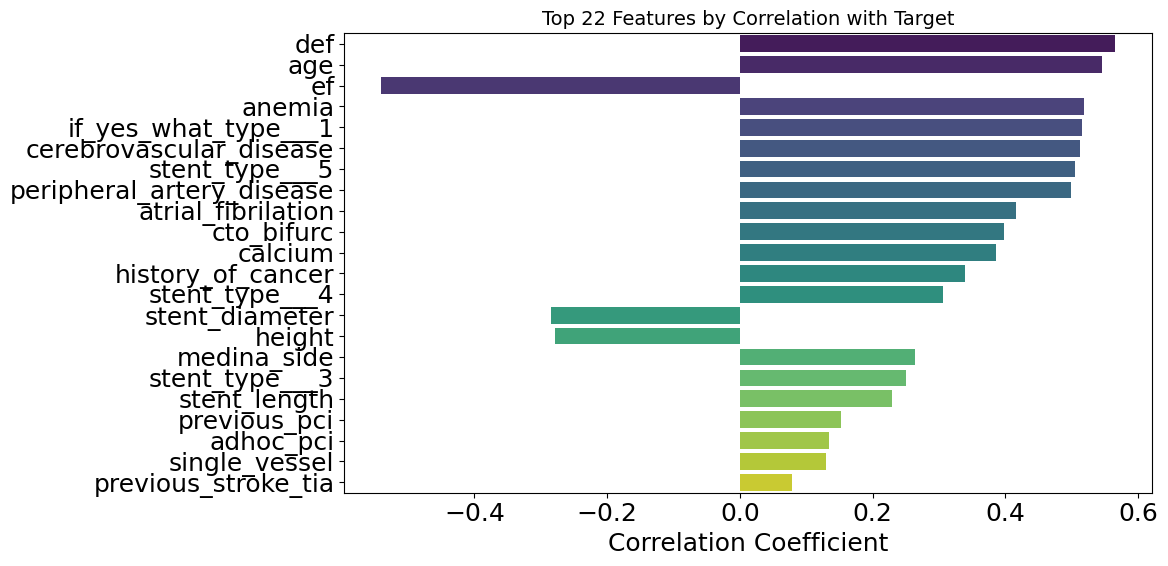

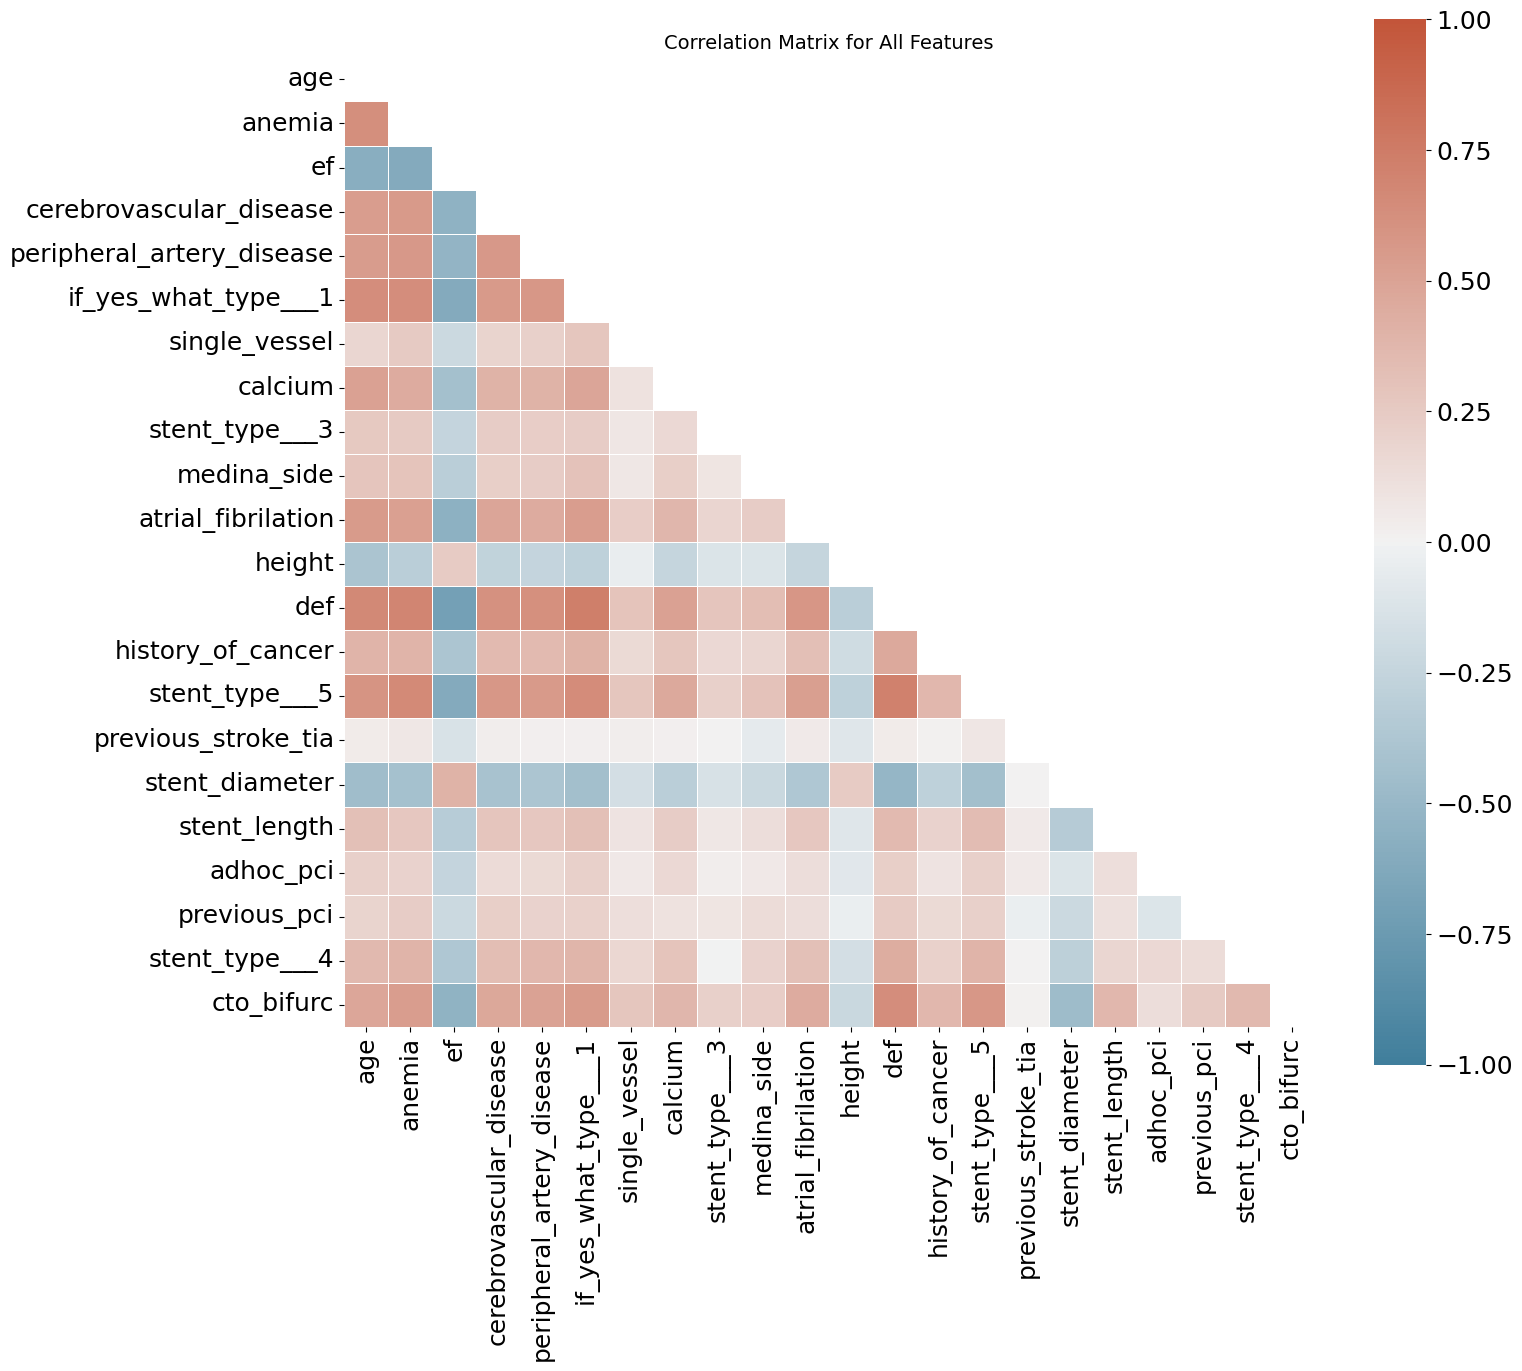


Top highly correlated feature pairs (correlation > 0.4):
if_yes_what_type___1 <-> def: 0.7318
def <-> stent_type___5: 0.7142
ef <-> def: 0.6986
anemia <-> def: 0.6942
age <-> def: 0.6688
anemia <-> stent_type___5: 0.6578
if_yes_what_type___1 <-> stent_type___5: 0.6467
anemia <-> if_yes_what_type___1: 0.6385
age <-> if_yes_what_type___1: 0.6365
def <-> cto_bifurc: 0.6358
age <-> anemia: 0.6320
peripheral_artery_disease <-> def: 0.6211
cerebrovascular_disease <-> def: 0.6142
ef <-> stent_type___5: 0.6141
ef <-> if_yes_what_type___1: 0.6128
anemia <-> ef: 0.6125
age <-> stent_type___5: 0.6010
atrial_fibrilation <-> def: 0.5824
age <-> ef: 0.5811
stent_type___5 <-> cto_bifurc: 0.5738
cerebrovascular_disease <-> stent_type___5: 0.5707
peripheral_artery_disease <-> if_yes_what_type___1: 0.5705
anemia <-> peripheral_artery_disease: 0.5668
cerebrovascular_disease <-> peripheral_artery_disease: 0.5666
peripheral_artery_disease <-> stent_type___5: 0.5623
ef <-> atrial_fibrilation: 0.5580
anemia

In [184]:
# Create a copy of the processed DataFrame for analysis
temp_df = X_train_combined.copy()

# Get correlations with target
target_correlations = temp_df.corr()['target'].drop('target')

# Sort by absolute correlation value
abs_correlations = target_correlations.abs().sort_values(ascending=False)
print(f"Features count: {len(abs_correlations)}")

# Visualization 1: Feature correlations with target
plt.figure(figsize=(12, 6))
# Plot top 30 features by correlation with target
num_features = min(30, len(abs_correlations))
top_features = abs_correlations[:num_features].index
top_target_correlations = target_correlations[top_features]

# Create a horizontal bar plot
sns.barplot(x=top_target_correlations.values, y=top_target_correlations.index, 
            palette='viridis')
plt.title(f'Top {num_features} Features by Correlation with Target', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Visualization 2: Correlation matrix between features (excluding target)
# Remove target column for feature-only correlation
features_df = X_train_combined.drop('target', axis=1)

# If there are too many features, select top 30 by correlation with target
if features_df.shape[1] > 30:
    top_k_features = abs_correlations[:30].index
    features_for_matrix = features_df[top_k_features]
    title = 'Correlation Matrix for Top 30 Features'
else:
    features_for_matrix = features_df
    title = 'Correlation Matrix for All Features'

# Calculate correlation matrix
corr_matrix = features_for_matrix.corr()

# Plot correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, 
            center=0, square=True, linewidths=.5,
            annot=False)  # Set annot=True for smaller matrices

plt.title(title, fontsize=14)
plt.tight_layout()
plt.show()

# Set a threshold for high correlation
high_corr_threshold = 0.4

# Find highly correlated feature pairs - IMPORTANT: use the SAME features as in corr_matrix
matrix_columns = corr_matrix.columns  # Use exactly the columns in the correlation matrix
high_corr_pairs = []
for i in range(len(matrix_columns)):
    for j in range(i+1, len(matrix_columns)):
        feature1 = matrix_columns[i]
        feature2 = matrix_columns[j]
        correlation = abs(corr_matrix.loc[feature1, feature2])
        if correlation > high_corr_threshold:
            high_corr_pairs.append((feature1, feature2, correlation))

# Sort pairs by correlation strength
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Display the top highly correlated pairs
print(f"\nTop highly correlated feature pairs (correlation > {high_corr_threshold}):")
for pair in high_corr_pairs[:30]:  # Show top 30 pairs
    print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.4f}")